In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

## First, read in your dataframe

In [2]:
data = pd.read_csv('findings_data.csv')

In [3]:
data.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


### To understand distributions of variables as they relate to diseases, let's try splitting up the 'Finding Labels' column into one additional column per disease (e.g. one for 'Cardiomegaly', one for 'Emphysema', etc.) and put a binary flag in that column to indicate the presence of the disease

In [4]:
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
895,896,896,Effusion|Pleural_Thickening,77,F,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
639,640,640,No Finding,39,F,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33,34,34,No Finding,45,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
## Now write your code here to visualize some of the distributions specified in the instructions

In [6]:
for label in all_labels:
    if label != 'Pneumonia':
        pc = scipy.stats.pearsonr(data["Pneumonia"], data[label])
        high = False
        if pc[0] > 0.1:
            high = True
        
        print(f'Pneumonia vs {label} correlation:\t {pc}, {high}')


Pneumonia vs Atelectasis correlation:	 (0.019682613610035805, 0.5343437482318838), False
Pneumonia vs Cardiomegaly correlation:	 (0.052269775701322685, 0.09870811534156111), False
Pneumonia vs Consolidation correlation:	 (0.04734834295120927, 0.13478336984289566), False
Pneumonia vs Edema correlation:	 (-0.009917089515370443, 0.7542317862642661), False
Pneumonia vs Effusion correlation:	 (0.01896535711689762, 0.5493458262864445), False
Pneumonia vs Emphysema correlation:	 (-0.010529378796689555, 0.7395915999667001), False
Pneumonia vs Fibrosis correlation:	 (-0.012955367905607862, 0.6825511699566466), False
Pneumonia vs Infiltration correlation:	 (0.04543532348514671, 0.15128262517530178), False
Pneumonia vs Mass correlation:	 (0.05564859638111697, 0.0787401310477159), False
Pneumonia vs No Finding correlation:	 (-0.09052155275636929, 0.004191084480200792), False
Pneumonia vs Nodule correlation:	 (0.17983145496643083, 1.043321285634057e-08), True
Pneumonia vs Pleural_Thickening correla

#### Pneumonia found to be correlating with nodules

### Age Distribution

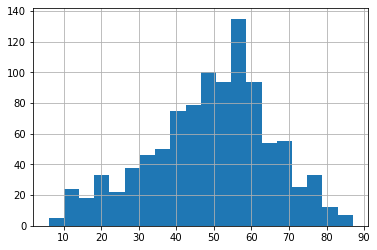

In [13]:
data['Patient Age'].hist(bins=20)

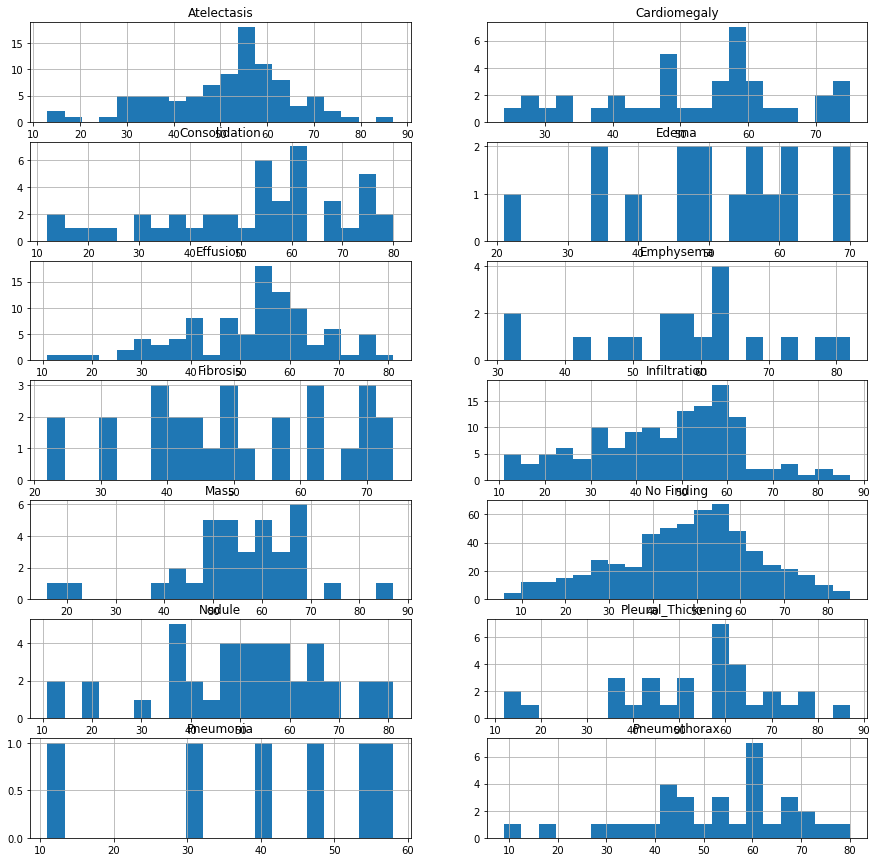

In [10]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
l = len(all_labels)

for i,label in enumerate(all_labels):
    
    subplt = fig.add_subplot(l/2, 2, i+1)
    data[data[label] > 0.0]['Patient Age'].hist(bins=20)
    subplt.set_title(label)


### Gender

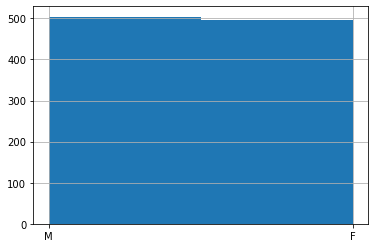

In [16]:
data['Patient Gender'].hist(bins=2)

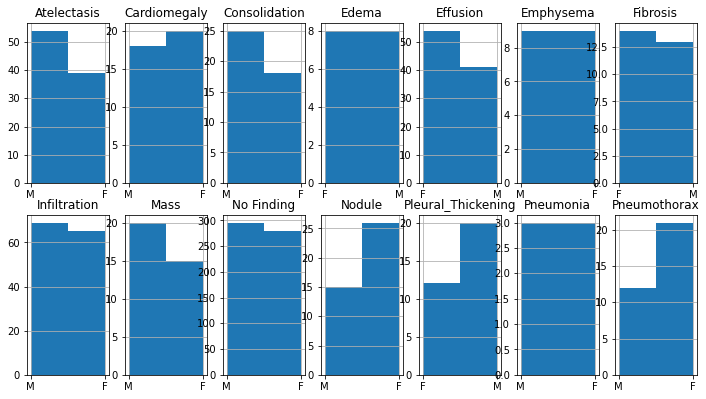

In [27]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(12)
l = len(all_labels)

for i,label in enumerate(all_labels):
    
    subplt = fig.add_subplot(l/7+1, 7, i+1)
    data[data[label] > 0.0]['Patient Gender'].hist(bins=2)
    subplt.set_title(label)

### Finally, look at if and how age & gender relate to mass size in individuals who have a mass as a finding:

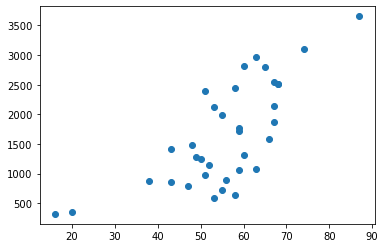

In [6]:
plt.scatter(data['Patient Age'],data['Mass_Size'])

In [14]:
## Use the following to see if there are significant correlations between the two: 

df = data[['Mass_Size', 'Patient Age', 'Patient Gender']]
df_mass = data[data['Mass_Size'].notnull()]
df_mass

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
4,5,5,Consolidation|Mass,68,M,2516.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,11,11,Mass,63,M,1071.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,18,18,Mass|Pneumothorax,60,M,2820.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
44,45,45,Consolidation|Mass,51,M,2397.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
46,47,47,Atelectasis|Infiltration|Mass|Pleural_Thickening,87,M,3654.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
66,67,67,Emphysema|Mass,48,M,1488.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
101,102,102,Mass|Pleural_Thickening,65,M,2795.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
107,108,108,Mass,53,F,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
113,114,114,Mass,59,M,1062.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
184,185,185,Mass|Pleural_Thickening,59,F,1770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### High value of Pearson Coeff 
High correlation between mass size and patent's age (below).

In [15]:
mass_sizes = df_mass['Mass_Size']
patient_ages = df_mass['Patient Age']

scipy.stats.pearsonr(mass_sizes,patient_ages)

(0.7275663300043572, 7.354553889321959e-07)

#### High value for T-test p-value (> 0.1)
Cannot reject the null-hypotheses of the equal averages (above), possibility for identical averages for male and female groups. 

Ref: [T-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [16]:
mass_sizes_male = df_mass[df_mass['Patient Gender'] == 'M']['Mass_Size']
mass_sizes_female = df_mass[df_mass['Patient Gender'] == 'F']['Mass_Size']
scipy.stats.ttest_ind(mass_sizes_male, mass_sizes_female)

Ttest_indResult(statistic=0.6188395721019645, pvalue=0.5402707532656863)